In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
train_end_idx = len(df) 
df_test = pd.read_csv('test.csv')
df_test['RainToday'] = np.zeros((len(df_test),))
print(train_end_idx)
print(len(df_test))
#print(df['WindDir9am'])
# 為了處理方便，把 'train.csv' 和 'test.csv' 合併起來，'test.csv'的 RainToday 欄位用 0 補起來。
# 以 train_end_idx 作為 'train.csv' 和 'test.csv' 分界列，
df = pd.concat([df, df_test], sort=False)
# df.drop(columns = [col for col in df.columns if df[col].dtype == np.object])
#print(df['WindDir9am'].isnull().sum())
#print(df['WindDir3pm'].isnull().sum())

35156
34844


In [3]:
from sklearn.preprocessing import LabelEncoder

dff = df.loc[:, ["WindDir9am","WindDir3pm"]]
dfff = dff.astype({"WindDir9am": str, "WindDir3pm": str})
encoder = LabelEncoder()
dfff["WindDir9am"] = encoder.fit_transform(dfff["WindDir9am"]) # need different encoder
dfff["WindDir3pm"] = encoder.fit_transform(dfff["WindDir3pm"])
df = df.drop(columns = [col for col in df.columns if df[col].dtype == np.object]) #delete original

df["WindDir9am"] = dfff["WindDir9am"]
df["WindDir3pm"] = dfff["WindDir3pm"]
#print(df)

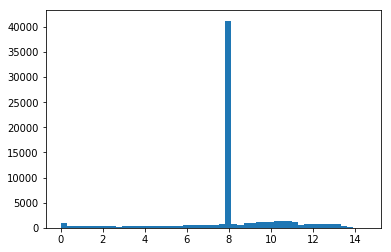

In [4]:

#print(df.isnull().sum())
#print(df['Sunshine'].describe()) 
df['Sunshine'].fillna(df['Sunshine'].mode()[0], inplace=True)
df['Sunshine'].hist(grid=False,bins=50)

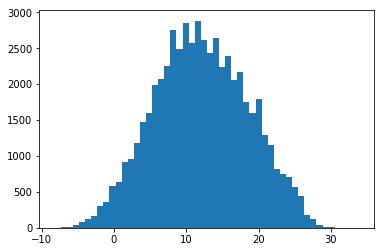

In [5]:
df['MinTemp'].hist(grid=False,bins=50)

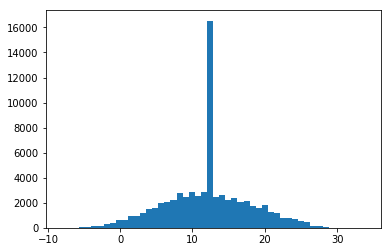

In [6]:
#print(df['MinTemp'].mean())
#print(df['MinTemp'].isnull().sum())
df['MinTemp'].fillna(df['MinTemp'].mean(), inplace=True)
df['MinTemp'].hist(grid=False,bins=50)

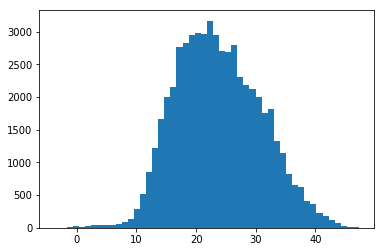

In [7]:
df['MaxTemp'].hist(grid=False,bins=50)

23.741634311360627
13826


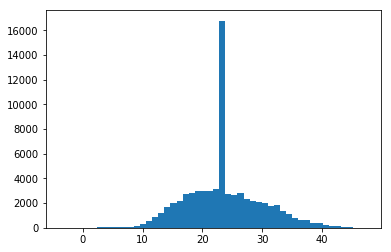

In [8]:
print(df['MaxTemp'].mean())
print(df['MaxTemp'].isnull().sum())
df['MaxTemp'].fillna(df['MaxTemp'].mean(), inplace=True)
df['MaxTemp'].hist(grid=False,bins=50)

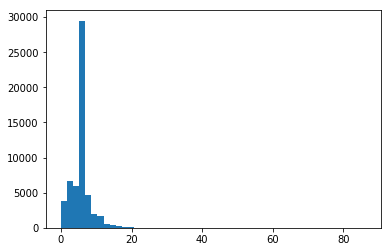

In [9]:
df['Evaporation'].hist(grid=False,bins=50)

5.6949604644890215
13981


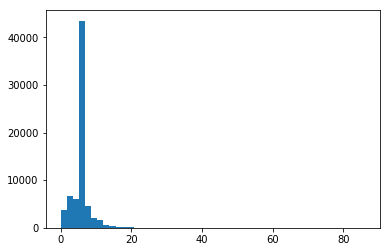

In [10]:
print(df['Evaporation'].mode()[0])
print(df['Evaporation'].isnull().sum())
df['Evaporation'].fillna(df['Evaporation'].mode()[0], inplace=True)
df['Evaporation'].hist(grid=False,bins=50)

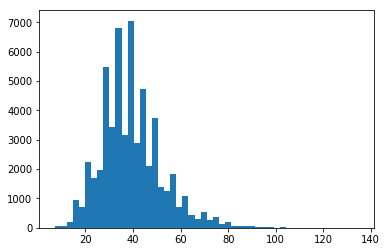

In [11]:
df['WindGustSpeed'].hist(grid=False,bins=50)

39.0
13834


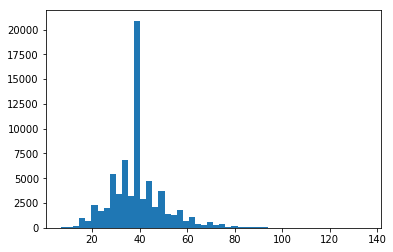

In [12]:
print(df['WindGustSpeed'].median())
print(df['WindGustSpeed'].isnull().sum())
df['WindGustSpeed'].fillna(df['WindGustSpeed'].median(), inplace=True)
df['WindGustSpeed'].hist(grid=False,bins=50)

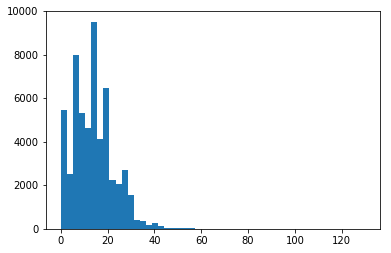

In [13]:
df['WindSpeed9am'].hist(grid=False,bins=50)

13.0
14029


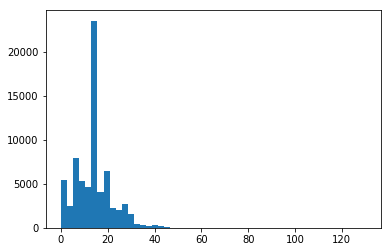

In [14]:
print(df['WindSpeed9am'].median())
print(df['WindSpeed9am'].isnull().sum())
df['WindSpeed9am'].fillna(df['WindSpeed9am'].median(), inplace=True)
df['WindSpeed9am'].hist(grid=False,bins=50)

count    56072.000000
mean        18.424823
std          8.604804
min          0.000000
25%         13.000000
50%         18.435879
75%         24.000000
max         78.000000
Name: WindSpeed3pm, dtype: float64
17.0


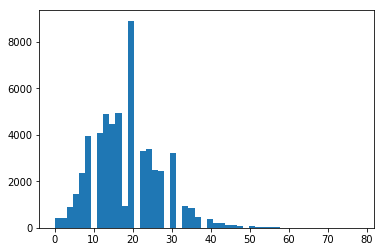

In [15]:
print(df['WindSpeed3pm'].describe()) 
print(df['WindSpeed3pm'].mode()[0])
p = df['WindSpeed3pm'].hist(grid=False,bins=50)
p

In [16]:
median = df['WindSpeed3pm'].median()
print(df['WindSpeed3pm'].isnull().sum())
#print(df['WindSpeed3pm'].loc[df['WindSpeed9am'] < 10])
df1 = df['WindSpeed3pm'].loc[df['WindSpeed9am'] < median]
df1.fillna(median, inplace=True)
#print(df1)
df2 = df['WindSpeed3pm'].loc[df['WindSpeed9am'] >= median]
df2.fillna(24, inplace=True)
#print(df2)
df['w'] = df1.append(df2, ignore_index=True)
df["WindSpeed3pm"] = df['w']

13928


0


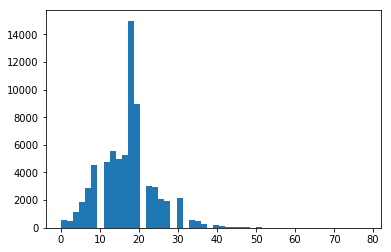

In [17]:
print(df['WindSpeed3pm'].isnull().sum())
m = df['WindSpeed3pm'].hist(grid=False,bins=50)
m

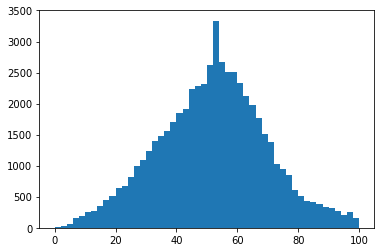

In [18]:
df['Humidity9am'].hist(grid=False,bins=50)

51.90220471611321
14056


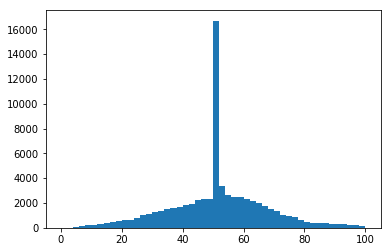

In [19]:
print(df['Humidity9am'].mean())
print(df['Humidity9am'].isnull().sum())
df['Humidity9am'].fillna(df['Humidity9am'].mean(), inplace=True)
df['Humidity9am'].hist(grid=False,bins=50)

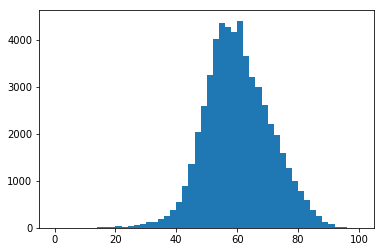

In [20]:
df['Humidity3pm'].hist(grid=False,bins=50)

60.24486132627096
14056


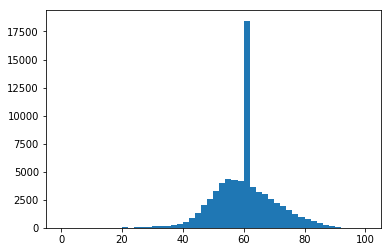

In [21]:
print(df['Humidity3pm'].mean())
print(df['Humidity3pm'].isnull().sum())
df['Humidity3pm'].fillna(df['Humidity3pm'].mean(), inplace=True)
df['Humidity3pm'].hist(grid=False,bins=50)

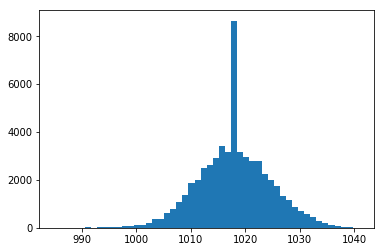

In [22]:
df['Pressure9am'].hist(grid=False,bins=50)

1018.043992313909
13964


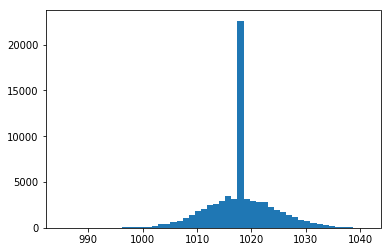

In [23]:
print(df['Pressure9am'].mean())
print(df['Pressure9am'].isnull().sum())
df['Pressure9am'].fillna(df['Pressure9am'].mean(), inplace=True)
df['Pressure9am'].hist(grid=False,bins=50)

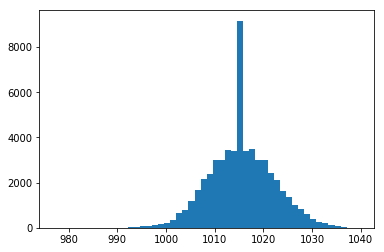

In [24]:
df['Pressure3pm'].hist(grid=False,bins=50)

1015.4726400497815
0    1015.465952
dtype: float64
1015.4659523861447
14104


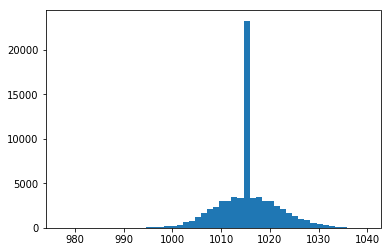

In [25]:
print(df['Pressure3pm'].mean())
print(df['Pressure3pm'].mode())
print(df['Pressure3pm'].median())
print(df['Pressure3pm'].isnull().sum())
df['Pressure3pm'].fillna(df['Pressure3pm'].mean(), inplace=True)
df['Pressure3pm'].hist(grid=False,bins=50)

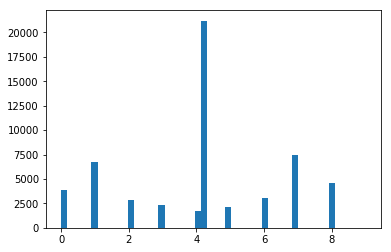

In [26]:
df['Cloud9am'].hist(grid=False,bins=50)

0    4.167266
dtype: float64


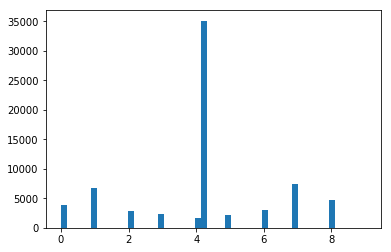

In [27]:
print(df['Cloud9am'].mode())
df['Cloud9am'].fillna(df['Cloud9am'].mode()[0], inplace=True)
df['Cloud9am'].hist(grid=False,bins=50)

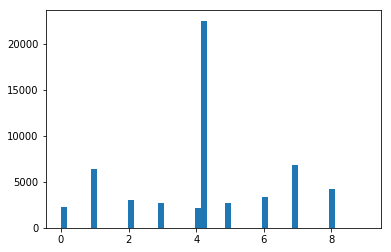

In [28]:
df['Cloud3pm'].hist(grid=False,bins=50)

4.278214514653611
0    4.27812
dtype: float64
4.278120269712399
13936


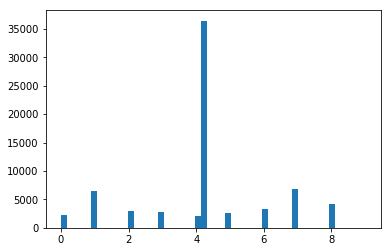

In [29]:
print(df['Cloud3pm'].mean())
print(df['Cloud3pm'].mode())
print(df['Cloud3pm'].median())
print(df['Cloud3pm'].isnull().sum())
df['Cloud3pm'].fillna(df['Cloud3pm'].mean(), inplace=True)
df['Cloud3pm'].hist(grid=False,bins=50)

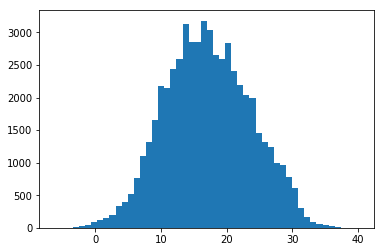

In [30]:
df['Temp9am'].hist(grid=False,bins=50)

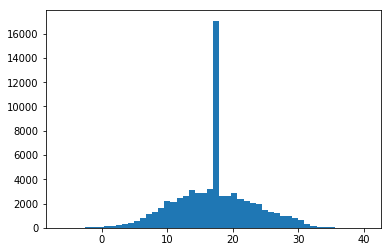

In [31]:
df['Temp9am'].fillna(df['Temp9am'].mean(), inplace=True)
df['Temp9am'].hist(grid=False,bins=50)

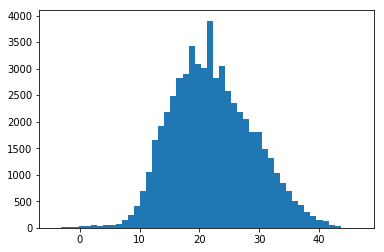

In [32]:
df['Temp3pm'].hist(grid=False,bins=50)

13937


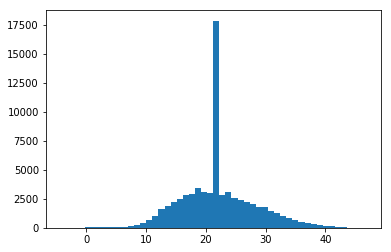

In [33]:
print(df['Temp3pm'].isnull().sum())
df['Temp3pm'].fillna(df['Temp3pm'].mean(), inplace=True)
df['Temp3pm'].hist(grid=False,bins=50)

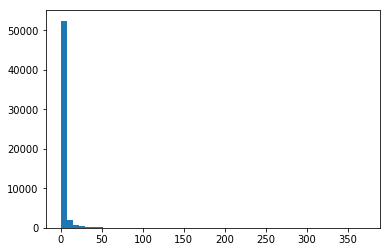

In [34]:
df['RISK_MM'].hist(grid=False,bins=50)

13871


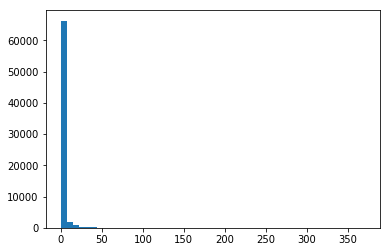

In [35]:
print(df['RISK_MM'].isnull().sum())
df['RISK_MM'].fillna(df['RISK_MM'].mode()[0], inplace=True)
df['RISK_MM'].hist(grid=False,bins=50)

In [36]:
df.to_csv('./processedData2.csv', index = False)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, FastICA

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns = ['RainToday']).values[:train_end_idx, :],
    df['RainToday'].values[:train_end_idx], test_size=0.3)
X_ans = df.drop(columns = ['RainToday']).values[train_end_idx:, :]

In [38]:
'''from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression, SGDRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier
#train tree model
model9 = XGBClassifier(
silent=0 ,#设置成1则没有运行信息输出，最好是设置为0.是否在运行升级时打印消息。
#nthread=4,# cpu 线程数 默认最大
learning_rate= 0.3, # 如同学习率
min_child_weight=9, 
# 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
#，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
#这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。
max_depth=6, # 构建树的深度，越大越容易过拟合
gamma=0.1,  # 树的叶子节点上作进一步分区所需的最小损失减少,越大越保守，一般0.1、0.2这样子。
subsample=1, # 随机采样训练样本 训练实例的子采样比
max_delta_step=0,#最大增量步长，我们允许每个树的权重估计。
colsample_bytree=1, # 生成树时进行的列采样 
reg_lambda=1,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
#reg_alpha=0, # L1 正则项参数
#scale_pos_weight=1, #如果取值大于0的话，在类别样本不平衡的情况下有助于快速收敛。平衡正负权重
#objective= 'multi:softmax', #多分类的问题 指定学习任务和相应的学习目标
#num_class=10, # 类别数，多分类与 multisoftmax 并用
n_estimators=100, #树的个数
seed=101 #随机种子
#eval_metric= 'auc'
)

#final_dt = DecisionTreeClassifier()                   
#final_bc = BaggingClassifier(base_estimator=final_dt, n_estimators=10, random_state=0, oob_score=True) 

#final_bc.fit(X_train, y_train)
#y_pred_decision = final_bc.predict(X_test) # 0.244
model1 = DecisionTreeClassifier(random_state=101) # 0.279
model3 = RandomForestClassifier(n_estimators= 17, random_state=101) #0.236
model4 = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)#, alpha=0.00011) #0.019
model6 = GaussianNB() # 0.31
model7 = AdaBoostClassifier(n_estimators=80, learning_rate= 1.4, random_state=101) # 0.27
#model.fit(X_train, y_train)

model = VotingClassifier(estimators=[('d1', model9), ('d6', model6), ('d7', model7)], voting='soft')
model.fit(X_train, y_train) #  0.409821
#model = GaussianNB()
#model1.fit(X_train,y_train)

y_pred_decision = model.predict(X_test)
print('Accuracy: %f' % accuracy_score(y_test, y_pred_decision))
print('f1-score: %f' % f1_score(y_test, y_pred_decision))'''

"from sklearn.tree import DecisionTreeClassifier\nfrom sklearn.metrics import accuracy_score, f1_score\nfrom sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier\nfrom sklearn.linear_model import SGDClassifier, LogisticRegression, SGDRegressor\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.ensemble import VotingClassifier\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom xgboost.sklearn import XGBClassifier\n#train tree model\nmodel9 = XGBClassifier(\nsilent=0 ,#设置成1则没有运行信息输出，最好是设置为0.是否在运行升级时打印消息。\n#nthread=4,# cpu 线程数 默认最大\nlearning_rate= 0.3, # 如同学习率\nmin_child_weight=9, \n# 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言\n#，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。\n#这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。\nmax_depth=6, # 构建树的深度，越大越容易过拟合\ngamma=0.1,  # 树的叶子节点上作进一步分区所需的最小损失减少,越大越保守，一般0.1、0.2这样子。\nsubsample=1, # 随机采样训练样本 训练实例的子采样比\nmax_delta_step=0,#最大增量步长，我们允许每个树的权重估计。\ncolsample_bytree=1, # 生成树时进行的列采样 

In [39]:
'''ans_pred = model9.predict(X_ans)
df_sap = pd.DataFrame(ans_pred.astype(int), columns = ['RainToday'])
df_sap.to_csv('myAns.csv',  index_label = 'Id')'''

"ans_pred = model9.predict(X_ans)\ndf_sap = pd.DataFrame(ans_pred.astype(int), columns = ['RainToday'])\ndf_sap.to_csv('myAns.csv',  index_label = 'Id')"